

```
CHANDAN KUMAR - RAHUL AGNIHOTRI(T.L)
```



#Initializing - spaCY 
#Install - Package | en_core_web_sm
#Pipeline : Efficiency 

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Uninstalling setuptools-58.0.4:
      Successfully uninstalled setuptools-58.0.4
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\tonyk\\AppData\\Local\\Temp\\pip-uninstall-l6iod40p\\pip.exe'
Consider using the `--user` option or check the permissions.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

#Containers

# BeautifulSoup : [https://en.wikipedia.org/wiki/Hacker](https://en.wikipedia.org/wiki/Hacker) : Wikipedia article

In [ ]:
import bs4
import sys
import requests

res = requests.get('https://en.wikipedia.org/wiki/Hacker')
res.raise_for_status()
wiki = bs4.BeautifulSoup(res.text,"html.parser")

filename = wiki.title.text.split(' - Wikipedia')[0]
with open(filename, 'w+') as f:
    for i in wiki.select('p'):
        f.write(i.getText())



# TEXT

In [ ]:
res.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Hacker - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b0296a00-bdcb-4659-991a-043ca1ac01e7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Hacker","wgTitle":"Hacker","wgCurRevisionId":1049374446,"wgRevisionId":1049374446,"wgArticleId":13533,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short description is different from Wikidata","Wikipedia indefinitely semi-protected pages","Wikipedia articles ne

In [ ]:
filename

'Hacker'

In [ ]:
i.getText()

'An encounter of the programmer and the computer security hacker subculture occurred at the end of the 1980s, when a group of computer security hackers, sympathizing with the Chaos Computer Club (which disclaimed any knowledge in these activities), broke into computers of American military organizations and academic institutions. They sold data from these machines to the Soviet secret service, one of them in order to fund his drug addiction. The case was solved when Clifford Stoll, a scientist working as a system administrator, found ways to log the attacks and to trace them back (with the help of many others). 23, a German film adaption with fictional elements, shows the events from the attackers\' perspective. Stoll described the case in his book The Cuckoo\'s Egg and in the TV documentary The KGB, the Computer, and Me from the other perspective. According to Eric S. Raymond, it "nicely illustrates the difference between \'hacker\' and \'cracker\'. Stoll\'s portrait of himself, his l

In [ ]:
doc = nlp(i.getText())

In [ ]:
doc

An encounter of the programmer and the computer security hacker subculture occurred at the end of the 1980s, when a group of computer security hackers, sympathizing with the Chaos Computer Club (which disclaimed any knowledge in these activities), broke into computers of American military organizations and academic institutions. They sold data from these machines to the Soviet secret service, one of them in order to fund his drug addiction. The case was solved when Clifford Stoll, a scientist working as a system administrator, found ways to log the attacks and to trace them back (with the help of many others). 23, a German film adaption with fictional elements, shows the events from the attackers' perspective. Stoll described the case in his book The Cuckoo's Egg and in the TV documentary The KGB, the Computer, and Me from the other perspective. According to Eric S. Raymond, it "nicely illustrates the difference between 'hacker' and 'cracker'. Stoll's portrait of himself, his lady Mart

In [ ]:
print (len(i.getText()))
print (len(doc))

1167
225


In [ ]:
# Iterate over the tokens
for token in doc[0:10]:
  print(token.text, "-->", token.pos_) # Print the token and its part-of-speech tag

An --> DET
encounter --> NOUN
of --> ADP
the --> DET
programmer --> NOUN
and --> CCONJ
the --> DET
computer --> NOUN
security --> NOUN
hacker --> NOUN


In [ ]:
for token in i.getText().split()[:10]:
    print (token)

An
encounter
of
the
programmer
and
the
computer
security
hacker


if there is any symbols, let's say the parentheses are not removed or handled individually. To see this more clearly, let’s print off all tokens from index 5 to 8 in both the text and doc objects.

#Sentence Boundary Detection (SBD)

In NLP, sentence boundary detection, or SBD, is the identification of sentences in a text. Again, this may seem fairly easy to do with rules. One could use split(“.”), but in English we use the period to also denote abbreviation.

In [ ]:
for sent in doc.sents:
    print (sent)

An encounter of the programmer and the computer security hacker subculture occurred at the end of the 1980s, when a group of computer security hackers, sympathizing with the Chaos Computer Club (which disclaimed any knowledge in these activities), broke into computers of American military organizations and academic institutions.
They sold data from these machines to the Soviet secret service, one of them in order to fund his drug addiction.
The case was solved when Clifford Stoll, a scientist working as a system administrator, found ways to log the attacks and to trace them back (with the help of many others).
23, a German film adaption with fictional elements, shows the events from the attackers' perspective.
Stoll described the case in his book The Cuckoo's Egg and in the TV documentary The KGB, the Computer, and Me from the other perspective.
According to Eric S. Raymond, it "nicely illustrates the difference between 'hacker' and 'cracker'.
Stoll's portrait of himself, his lady Mart

In [ ]:
"""
sent1 = doc.sents[0]
print (sent1)

TypeError                                 Traceback (most recent call last)
<ipython-input-22-d41723e99bb6> in <module>()
----> 1 sent1 = doc.sents[0]
      2 print (sent1)

TypeError: 'generator' object is not subscriptable

for that we have to convert them into list.
"""

"\nsent1 = doc.sents[0]\nprint (sent1)\n\nTypeError                                 Traceback (most recent call last)\n<ipython-input-22-d41723e99bb6> in <module>()\n----> 1 sent1 = doc.sents[0]\n      2 print (sent1)\n\nTypeError: 'generator' object is not subscriptable\n\nfor that we have to convert them into list.\n"

In [ ]:
sent1 = list(doc.sents)[0]
print (sent1)

An encounter of the programmer and the computer security hacker subculture occurred at the end of the 1980s, when a group of computer security hackers, sympathizing with the Chaos Computer Club (which disclaimed any knowledge in these activities), broke into computers of American military organizations and academic institutions.


# Token Attributes

The token object contains a lot of different attributes that are VITAL do performing NLP in spaCy. We will be working with a few of them, such as:

.text

.head

.left_edge

.right_edge

.ent_type_

.iob_

.lemma_

.morph

.pos_

.dep_

.lang_

In [ ]:
sent1

An encounter of the programmer and the computer security hacker subculture occurred at the end of the 1980s, when a group of computer security hackers, sympathizing with the Chaos Computer Club (which disclaimed any knowledge in these activities), broke into computers of American military organizations and academic institutions.

In [ ]:
token2 = sent1[2]
print (token2)

of


In [ ]:
#Head
print(token2.head)
print('This tells to which word it is governed by')

encounter
This tells to which word it is governed by


English has two articles: the and a/an. The is used to refer to specific or particular nouns; a/an is used to modify non-specific or non-particular nouns. We call the the definite article and a/an the indefinite article.

the = definite article

a/an = indefinite article

[purdue.edu](https://owl.purdue.edu/owl/general_writing/grammar/using_articles.html)

In [ ]:
#Left Edge 
token2.left_edge
#The leftmost token of this token’s syntactic descendants.

of

In [ ]:
#Right Edge
token2.right_edge
#The rightmost token of this token’s syntactic descendants.

subculture

In [ ]:
#Entity Type
token2.ent_type
#Named entity type.

0

#Part of Speech Tagging (POS)

In the field of computational linguistics, understanding parts-of-speech is essential. SpaCy offers an easy way to parse a text and identify its parts of speech. Below, we will iterate across each token (word or punctuation) in the text and identify its part of speech.

In [ ]:
for token in sent1:
    print (token.text, token.pos_, token.dep_)

An DET det
encounter NOUN nsubj
of ADP prep
the DET det
programmer NOUN pobj
and CCONJ cc
the DET det
computer NOUN compound
security NOUN compound
hacker NOUN compound
subculture NOUN conj
occurred VERB ROOT
at ADP prep
the DET det
end NOUN pobj
of ADP prep
the DET det
1980s NOUN pobj
, PUNCT punct
when ADV advmod
a DET det
group NOUN nsubj
of ADP prep
computer NOUN compound
security NOUN compound
hackers NOUN pobj
, PUNCT punct
sympathizing VERB acl
with ADP prep
the DET det
Chaos PROPN compound
Computer PROPN compound
Club PROPN pobj
( PUNCT punct
which DET nsubj
disclaimed VERB relcl
any DET det
knowledge NOUN dobj
in ADP prep
these DET det
activities NOUN pobj
) PUNCT punct
, PUNCT punct
broke VERB relcl
into ADP prep
computers NOUN pobj
of ADP prep
American ADJ amod
military ADJ amod
organizations NOUN pobj
and CCONJ cc
academic ADJ amod
institutions NOUN conj
. PUNCT punct


#Displacy || @!!

In [ ]:
"""

import spacy
from spacy import displacy

displacy.serve(doc, style="dep")


import spacy
from spacy import displacy

displacy.serve(sent1, style="dep")


import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.serve(doc, style="dep")
"""

'\n\nimport spacy\nfrom spacy import displacy\n\ndisplacy.serve(doc, style="dep")\n\n\nimport spacy\nfrom spacy import displacy\n\ndisplacy.serve(sent1, style="dep")\n\n\nimport spacy\nfrom spacy import displacy\n\nnlp = spacy.load("en_core_web_sm")\ndoc = nlp("This is a sentence.")\ndisplacy.serve(doc, style="dep")\n'

In [ ]:
!python -m spacy download en
import spacy
from spacy import displacy

# In[2]:
doc = nlp("Rats are various medium-sized, long-tailed rodents.")
displacy.render(doc, style="dep")

# In[3]:
doc2 = nlp("Rats are various medium-sized, long-tailed rodents.")
displacy.render(doc2, style="ent")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Users\tonyk\anaconda3\lib\site-packages\spacy\displacy\__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


#Part of Speech Tagging (POS)

In the field of computational linguistics, understanding parts-of-speech is essential. SpaCy offers an easy way to parse a text and identify its parts of speech. Below, we will iterate across each token (word or punctuation) in the text and identify its part of speech.

In [ ]:
for token in sent1:
    print (token.text, token.pos_, token.dep_)

An DET det
encounter NOUN nsubj
of ADP prep
the DET det
programmer NOUN pobj
and CCONJ cc
the DET det
computer NOUN compound
security NOUN compound
hacker NOUN compound
subculture NOUN conj
occurred VERB ROOT
at ADP prep
the DET det
end NOUN pobj
of ADP prep
the DET det
1980s NOUN pobj
, PUNCT punct
when ADV advmod
a DET det
group NOUN nsubj
of ADP prep
computer NOUN compound
security NOUN compound
hackers NOUN pobj
, PUNCT punct
sympathizing VERB acl
with ADP prep
the DET det
Chaos PROPN compound
Computer PROPN compound
Club PROPN pobj
( PUNCT punct
which DET nsubj
disclaimed VERB relcl
any DET det
knowledge NOUN dobj
in ADP prep
these DET det
activities NOUN pobj
) PUNCT punct
, PUNCT punct
broke VERB relcl
into ADP prep
computers NOUN pobj
of ADP prep
American ADJ amod
military ADJ amod
organizations NOUN pobj
and CCONJ cc
academic ADJ amod
institutions NOUN conj
. PUNCT punct


#Named Entity Recognition

Another essential task of NLP, is named entity recognition, or NER. I spoke about NER in the last notebook. Here, I’d like to demonstrate how to perform basic NER via spaCy. Again, we will iterate over the doc object as we did above, but instead of iterating over doc.sents, we will iterate over doc.ents. For our purposes right now, I simply want to print off each entity’s text (the string itself) and its corresponding label (note the _ after label). I will be explaining this process in much greater detail in the next two notebooks.

In [ ]:
for ent in doc.ents:
    print (ent.text, ent.label_)

In [ ]:
displacy.render(sent1, style="ent")

#Word Vectors and spaCy

In [ ]:
import spacy
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import bs4
import sys
import requests

res = requests.get('https://en.wikipedia.org/wiki/Google')
res.raise_for_status()
wiki = bs4.BeautifulSoup(res.text,"html.parser")

filename = wiki.title.text.split(' - Wikipedia')[0]
with open(filename, 'w+') as f:
    for i in wiki.select('p'):
        f.write(i.getText())

doc = nlp(i.getText())
sentence1 = list(doc.sents)[0]


In [ ]:
doc

In early June 2020, a $5 billion class-action lawsuit was filed against Google by a group of consumers, alleging that Chrome’s Incognito browsing mode still collects their user history.[338][339] The lawsuit became known in March 2021 when a federal judge denied Google's request to dismiss the case, ruling that they must face the group’s charges.[340][341] Reuters reported that the lawsuit alleged that Google's CEO Sundar Pichai sought to keep the users unaware of this issue.[342]

In [ ]:
sentence1

In early June 2020, a $5 billion class-action lawsuit was filed against Google by a group of consumers, alleging that Chrome’s

In [ ]:
print(len(doc), len(sentence1))

89 27


#Word Vectors

Word vectors, or word embeddings, are numerical representations of words in multidimensional space through matrices. The purpose of the word vector is to get a computer system to understand a word. Computers cannot understand text efficiently. They can, however, process numbers quickly and well. For this reason, it is important to convert a word into a number.

Initial methods for creating word vectors in a pipeline take all words in a corpus and convert them into a single, unique number. These words are then stored in a dictionary that would look like this: {“the”: 1, “a”, 2} etc. This is known as a bag of words. This approach to representing words numerically, however, only allow a computer to understand words numerically to identify unique words. It does not, however, allow a computer to understand meaning.

Imagine this scenario:

Tom loves to eat chocolate.

Tom likes to eat chocolate.

These sentences represented as a numerical array (list) would look like this:

1, 2, 3, 4, 5

1, 6, 3, 4, 5

#Why use Word Vectors? !!!
##The goal of word vectors is to achieve numerical understanding of language so that a computer can perform more complex tasks on that corpus.


In [ ]:
import spacy
!python -m spacy download en_core_web_md

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.1.0/en_core_web_md-3.1.0-py3-none-any.whl (45.4 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
!pip


Usage:   
  pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                    

In [ ]:
!python3 -m pip install PyDictionary


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [ ]:
!python -m pip install --upgrade pip setuptools wheel

In [ ]:
!pip install PyDictionary

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha2

  ERROR: Command errored out with exit status 1:
   command: 'c:\users\tonyk\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tonyk\\AppData\\Local\\Temp\\pip-install-mlopsei1\\futures_fbc59f36c4ec4a578a3cbd820f52d740\\setup.py'"'"'; __file__='"'"'C:\\Users\\tonyk\\AppData\\Local\\Temp\\pip-install-mlopsei1\\futures_fbc59f36c4ec4a578a3cbd820f52d740\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\tonyk\AppData\Local\Temp\pip-pip-egg-info-03oe3g8t'
       cwd: C:\Users\tonyk\AppData\Local\Temp\pip-install-mlopsei1\futures_fbc59f36c4ec4a578a3cbd820f52d740\
  Complete output (24 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "c:\users\tonyk\an

In [ ]:
"""from PyDictionary import PyDictionary

dictionary=PyDictionary()
text = "Tom loves to eat chocolate"

words = text.split()
for word in words:
    syns = dictionary.synonym(word)
    print (f"{word}: {syns[0:5]}\n")"""

'from PyDictionary import PyDictionary\n\ndictionary=PyDictionary()\ntext = "Tom loves to eat chocolate"\n\nwords = text.split()\nfor word in words:\n    syns = dictionary.synonym(word)\n    print (f"{word}: {syns[0:5]}\n")'

In [ ]:
sentence1[0].vector

array([ 0.4243895 , -1.1357836 , -0.7388455 ,  1.167083  , -0.2539115 ,
        2.2520673 ,  0.19665164, -0.16779786,  1.7895561 , -0.41019502,
        0.1786462 , -0.3911984 , -0.73946637, -0.6672654 ,  0.3961728 ,
       -0.08651794,  0.4821537 , -0.4229348 ,  0.9193083 ,  0.60310274,
       -0.33057815,  0.032754  ,  0.16855478, -0.93061554, -0.8957278 ,
       -0.5661322 , -0.4771945 ,  0.13321853, -0.46748042, -0.58423686,
       -0.17528343, -0.36372685,  0.47082973, -0.92259556,  0.22647811,
        0.52608585,  0.5512797 ,  0.242601  , -0.07193935,  1.3411673 ,
       -0.35971162, -0.20665945, -0.07021008, -0.89095664,  0.7788221 ,
       -0.02444953, -0.2349006 , -0.35710016, -0.10362059,  2.6946478 ,
       -0.3586272 , -0.04248695,  0.24057104,  0.81911665, -0.2810368 ,
       -0.5328187 ,  0.27691597, -0.5114486 , -0.2627864 , -0.14488788,
       -0.2703958 ,  0.079225  ,  0.35097077, -0.16841477, -0.78943694,
       -0.18967327,  0.34595585, -0.04254089,  0.30020756,  0.14

##Mapping-Word-Vector !!!

In [ ]:
import numpy as np

Once a word vector model is trained, we can do similarity matches very quickly and very reliably.

In [ ]:
"""your_word = "dog"
ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)"""

'your_word = "dog"\nms = nlp.vocab.vectors.most_similar(\n    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)\nwords = [nlp.vocab.strings[w] for w in ms[0][0]]\ndistances = ms[2]\nprint(words)'

#Doc Similarity $ : 
In spaCy we can do this same thing at the document level. Through word vectors we can calculate the similarity between two documents. Let’s look at the example from spaCy’s documentation.

In [ ]:
nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.77994864211694


#Word Similarity

In [ ]:
# Similarity of tokens and spans
french_fries = doc1[2:4] # salty fries
burgers = doc1[5] # hamburgers
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

salty fries <-> hamburgers 0.7304624


In [ ]:
food = doc2[2]
good = doc2[4]

print(food, "<->", good, food.similarity(good))

tastes <-> good 0.4234938


#________________________________

# spaCy’s Pipelines *

SpaCy offers both heuristic (rules-based) and machine learning natural language processing solutions. These solutions are activated by pipes. In this notebook, you will learn about pipes and pipelines generally and the ones offered by spaCy specifically.

In [ ]:
import spacy

##Standard Pipes (Components and Factories) Available from spaCy

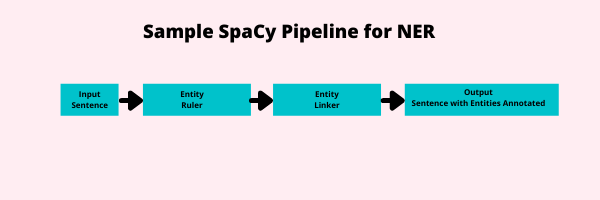

SpaCy is much more than an NLP framework. It is also a way of designing and implementing complex pipelines. A pipeline is a sequence of pipes, or actors on data, that make alterations to the data or extract information from it. In some cases, later pipes require the output from earlier pipes.

#Attribute Rulers




```

Dependency Parser

EntityLinker

EntityRecognizer

EntityRuler

Lemmatizer

Morpholog

SentenceRecognizer

Sentencizer

SpanCategorizer

Tagger

TextCategorizer

Tok2Vec

Tokenizer

TrainablePipe

Transformer
```



#Matchers



```
DependencyMatcher

Matcher

PhraseMatcher
```



#off-the-shelf spaCy model :  Pipelines

In [ ]:
nlp = spacy.blank("en")


In [ ]:
nlp.add_pipe("sentencizer") 
# to add a new pipe to it. We will simply add a sentencizer.



```
A simple pipeline component to allow custom sentence boundary detection logic that doesn’t require 

the dependency parse. By default, sentence segmentation is performed by the DependencyParser, so the Sentencizer 

lets you implement a simpler, rule-based strategy that doesn’t require a statistical model to be loaded.
```



#bs4

In [ ]:
import requests
from bs4 import BeautifulSoup
s = requests.get("https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt")
soup = BeautifulSoup(s.content).text.replace("-\n", "").replace("\n", " ")
nlp.max_length = 5278439

In [ ]:
%%time
doc = nlp(soup)
print (len(list(doc.sents)))

94133
Wall time: 9.37 s


In [ ]:
nlp2 = spacy.load("en_core_web_sm")
nlp2.max_length = 5278439

In [ ]:
"""%%time
doc = nlp2(soup)
print (len(list(doc.sents)))"""



```
The difference in time here is remarkable. Our text string was around 5.2 million characters.

The blank model with just the Sentencizer completed its task in 11.

54 seconds and found around 94k sentences
```



#____________________

#Using SpaCy’s EntityRuler

# Introduction to Spacy’s EntityRuler

#The Python library spaCy offers a few different methods for performing rules-based NER. One such method is via its EntityRuler.

- The EntityRuler is a spaCy factory that allows one to create a set of patterns with corresponding labels. A factory in spaCy is a set of classes and functions preloaded in spaCy that perform set tasks. In the case of the EntityRuler, the factory at hand allows the user to create an EntityRuler, give it a set of instructions, and then use this instructions to find and label entities.

- Once the user has created the EntityRuler and given it a set of instructions, the user can then add it to the spaCy pipeline as a new pipe. I have spoken in the past notebooks briefly about pipes, but perhaps it is good to address them in more detail here.

- A pipe is a component of a pipeline. A pipeline’s purpose is to take input data, perform some sort of operations on that input data, and then output those operations either as a new data or extracted metadata. 

- A pipe is an individual component of a pipeline. In the case of spaCy, there are a few different pipes that perform different tasks. The tokenizer, tokenizes the text into individual tokens; the parser, parses the text, and the NER identifies entities and labels them accordingly. 

- All of this data is stored in the Doc object.

In [ ]:
#Import the requisite library
import spacy

#Build upon the spaCy Small Model
nlp = spacy.load("en_core_web_sm")

#Sample text
text = "The village of Treblinka is in Poland. Treblinka was also an extermination camp."

#Create the Doc object
doc = nlp(text)

#extract entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Treblinka LOC
Poland GPE


#Depending on the version of model you are using, some results may vary.



```
The output from the code above demonstrates spaCy’s small model’s to identify Treblinka, which is a small village in Poland. 

As the sample text indicates, it was also an extermination camp during WWII. 


In the first sentence, the spaCy model tagged Treblinka as an LOC (location) and in the second it was missed entirely. 


Both are either imprecise or wrong. I would have accepted ORG for the second sentence, 

as spaCy’s model does not know how to classify an extermination camp, but what these results demonstrate is the model’s failure to generalize on data. 
```



##the model never encountered the word Treblinka.

In [ ]:
#Import the requisite library
import spacy

#Build upon the spaCy Small Model
nlp = spacy.load("en_core_web_sm")

#Sample text
text = "The village of Treblinka is in Poland. Treblinka was also an extermination camp."

#Create the EntityRuler
ruler = nlp.add_pipe('entity_ruler')

#List of Entities and Patterns
patterns = [
                {"label": "GPE", "pattern": "Treblinka"}
            ]

ruler.add_patterns(patterns)


doc = nlp(text)

#extract entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Treblinka LOC
Poland GPE
Treblinka GPE


In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

ruler = nlp.add_pipe(“entity_ruler”, after=”ner”)

In order for our EntityRuler to have primacy, we have to assign it to after the "ner" pipe

In [ ]:
#Build upon the spaCy Small Model
nlp = spacy.load("en_core_web_sm")

#Sample text
text = "The village of Treblinka is in Poland. Treblinka was also an extermination camp."

#Create the EntityRuler
ruler = nlp.add_pipe("entity_ruler", after="ner")

#List of Entities and Patterns
patterns = [
                {"label": "GPE", "pattern": "Treblinka"}
            ]

ruler.add_patterns(patterns)


doc = nlp(text)

#extract entities
for ent in doc.ents:
    print (ent.text, ent.label_)

Treblinka LOC
Poland GPE
Treblinka GPE


# Introducing Complex Rules and Variance to the EntityRuler (Advanced)

In [ ]:
#Import the requisite library
import spacy

#Sample text
text = "This is a sample number +91 96 9639 2042."

#Build upon the spaCy Small Model
nlp = spacy.blank("en")

#Create the Ruler and Add it
ruler = nlp.add_pipe("entity_ruler")

#List of Entities and Patterns (source: https://spacy.io/usage/rule-based-matching)
patterns = [
                {"label": "PHONE_NUMBER", "pattern": [{"ORTH": "+"}, {"SHAPE": "dd"}, {"SHAPE": "dd"},
                {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}, {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]}
            ]
#add patterns to ruler
ruler.add_patterns(patterns)



#create the doc
doc = nlp(text)

#extract entities
for ent in doc.ents:
    print (ent.text, ent.label_)

# The spaCy Matcher

In [ ]:
import spacy

In [ ]:
from spacy.matcher import Matcher

In [ ]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL_ADDRESS", [pattern])
doc = nlp("This is an email address: abc@outlook.com")
matches = matcher(doc)

In [ ]:
print (matches)

[(16571425990740197027, 6, 7)]


Lexeme, start token, end token

In [ ]:
print (nlp.vocab[matches[0][0]].text)


EMAIL_ADDRESS


# Attributes Taken by Matcher


ORTH - The exact verbatim of a token (str)

TEXT - The exact verbatim of a token (str)

LOWER - The lowercase form of the token text (str)

LENGTH - The length of the token text (int)

IS_ALPHA

IS_ASCII

IS_DIGIT

IS_LOWER

IS_UPPER

IS_TITLE

IS_PUNCT

IS_SPACE

IS_STOP

IS_SENT_START

LIKE_NUM

LIKE_URL

LIKE_EMAIL

SPACY

POS

TAG

MORPH

DEP

LEMMA

SHAPE

ENT_TYPE

_ - Custom extension attributes (Dict[str, Any])

OP

## Applied Matcher

In [ ]:
import bs4
import sys
import requests

res = requests.get('https://en.wikipedia.org/wiki/Google')
res.raise_for_status()
wiki = bs4.BeautifulSoup(res.text,"html.parser")

filename = wiki.title.text.split(' - Wikipedia')[0]
with open(filename, 'w+') as f:
    for i in wiki.select('p'):
        f.write(i.getText())

        
nlp = spacy.load("en_core_web_sm")
doc = nlp(i.getText())
text = list(doc.sents)[0]

In [ ]:
text

In early June 2020, a $5 billion class-action lawsuit was filed against Google by a group of consumers, alleging that Chrome’s

In [ ]:
doc

In early June 2020, a $5 billion class-action lawsuit was filed against Google by a group of consumers, alleging that Chrome’s Incognito browsing mode still collects their user history.[337][338] The lawsuit became known in March 2021 when a federal judge denied Google's request to dismiss the case, ruling that they must face the group’s charges.[339][340] Reuters reported that the lawsuit alleged that Google's CEO Sundar Pichai sought to keep the users unaware of this issue.[341]

Grabbing all Proper Nouns

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern])
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

11
(3232560085755078826, 2, 3) June
(3232560085755078826, 16, 17) Google
(3232560085755078826, 25, 26) Chrome
(3232560085755078826, 27, 28) Incognito
(3232560085755078826, 41, 42) March
(3232560085755078826, 48, 49) Google
(3232560085755078826, 66, 67) Reuters
(3232560085755078826, 73, 74) Google
(3232560085755078826, 75, 76) CEO
(3232560085755078826, 76, 77) Sundar


Improving it with Multi-Word Tokens

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern])
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

14
(3232560085755078826, 2, 3) June
(3232560085755078826, 16, 17) Google
(3232560085755078826, 25, 26) Chrome
(3232560085755078826, 27, 28) Incognito
(3232560085755078826, 41, 42) March
(3232560085755078826, 48, 49) Google
(3232560085755078826, 66, 67) Reuters
(3232560085755078826, 73, 74) Google
(3232560085755078826, 75, 76) CEO
(3232560085755078826, 75, 77) CEO Sundar


# Greedy Keyword Argument

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

9
(3232560085755078826, 75, 78) CEO Sundar Pichai
(3232560085755078826, 2, 3) June
(3232560085755078826, 16, 17) Google
(3232560085755078826, 25, 26) Chrome
(3232560085755078826, 27, 28) Incognito
(3232560085755078826, 41, 42) March
(3232560085755078826, 48, 49) Google
(3232560085755078826, 66, 67) Reuters
(3232560085755078826, 73, 74) Google


# Sorting it to Apperance

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

9
(3232560085755078826, 2, 3) June
(3232560085755078826, 16, 17) Google
(3232560085755078826, 25, 26) Chrome
(3232560085755078826, 27, 28) Incognito
(3232560085755078826, 41, 42) March
(3232560085755078826, 48, 49) Google
(3232560085755078826, 66, 67) Reuters
(3232560085755078826, 73, 74) Google
(3232560085755078826, 75, 78) CEO Sundar Pichai


# Adding in Sequences

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "PROPN", "OP": "+"}, {"POS": "VERB"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

3
(3232560085755078826, 27, 29) Incognito browsing
(3232560085755078826, 66, 68) Reuters reported
(3232560085755078826, 75, 79) CEO Sundar Pichai sought


# Finding Quotes and Speakers

In [ ]:
text

In early June 2020, a $5 billion class-action lawsuit was filed against Google by a group of consumers, alleging that Chrome’s

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern], greedy='LONGEST')

matches = matcher(text)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, text[match[1]:match[2]])

0


In [ ]:
"""
Find Speaker

speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1], greedy='LONGEST')
doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x: x[1])
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])


Adding More Patterns

speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
pattern2 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}]
pattern3 = [{"POS": "PROPN", "OP": "+"},{"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1, pattern2, pattern3], greedy='LONGEST')
for text in data[0][2]:
    text = text.replace("`", "'")
    doc = nlp(text)
    matches = matcher(doc)
    matches.sort(key = lambda x: x[1])
    print (len(matches))
    for match in matches[:10]:
        print (match, doc[match[1]:match[2]])

"""

# Using RegEx with spaCy

Regular Expressions, or RegEx for short, is a way of achieving complex string matching based on simple or complex patterns. It can be used to perform finding and retrieving patterns or replacing matching patterns in a string with some other pattern.

## The Strengths of RegEx

There are several strengths to RegEx.

1. Due to its complex syntax, it can allow for programmers to write robust rules in short spaces.

2. It can allow the researcher to find all types of variance in strings

3. It can perform remarkably quickly when compared to other methods.

4. It is universally supported

## The Weaknesses of RegEx

Despite these strengths, there are a few weaknesses to RegEx.

1. Its syntax is quite difficult for beginners. (I still find myself looking up how to do certain things).

2. It order to work well, it requires a domain-expert to work alongside the programmer to think of all ways a pattern may vary in texts.

In [ ]:
import re

In [ ]:
pattern = r"((\d){1,2} (January|February|March|April|May|June|July|August|September|October|November|December))"

text = "This is a date 2 February. Another date would be 14 August."
matches = re.findall(pattern, text)
print (matches)

[('2 February', '2', 'February'), ('14 August', '4', 'August')]


 (\d){1,2}. This means that we are looking for any digit (0-9) that occurs either once or twice ({1,2}).

In [ ]:
#Import the requisite library
import spacy

#Sample text
text = "This is a sample number 555-5555."

#Build upon the spaCy Small Model
nlp = spacy.blank("en")

#Create the Ruler and Add it
ruler = nlp.add_pipe("entity_ruler")

#List of Entities and Patterns (source: https://spacy.io/usage/rule-based-matching)
patterns = [
                {"label": "PHONE_NUMBER", "pattern": [{"SHAPE": "ddd"},
                {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]}
            ]
#add patterns to ruler
ruler.add_patterns(patterns)

#create the doc
doc = nlp(text)

#extract entities
for ent in doc.ents:
    print (ent.text, ent.label_)

555-5555 PHONE_NUMBER


In [ ]:
import re

text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host. The name Paul is quite common."

pattern = r"Paul [A-Z]\w+"

matches = re.finditer(pattern, text)

for match in matches:
    print (match)

<re.Match object; span=(0, 11), match='Paul Newman'>
<re.Match object; span=(39, 53), match='Paul Hollywood'>


 re.finditer(pattern, string, flags=0) Return an iterator yielding MatchObject instances over all non-overlapping matches for the RE pattern in string. 

# Reconstruct Spans

In [ ]:
import re
import spacy
from spacy.tokens import Span

In [ ]:
text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host. The name Paul is quite common."
pattern = r"Paul [A-Z]\w+"

Create a blank spaCy English model and create the doc object of the text. It will have no entities in it because we are working with a blank model that does not have an “ner” component.

In [ ]:
nlp = spacy.blank("en")
doc = nlp(text)

Even though this part is unnecessary, it is good to do it here because in other situations you will have entities. If you do, you need to store them as a separate list to which we will append things.

In [ ]:
original_ents = list(doc.ents)

let’s iterate over the results from re.finditer(). In this cell, we are goingg to grab the start and end from each match. we will then create a temporary span that will be equal to where the characters start and end in the doc object. This is important because tokens and characters do not always align correctly.

Finally, we append to mwt_ents, the start, end, and text. The text is not necessary but it will help with debugging.



In [ ]:
mwt_ents = []
for match in re.finditer(pattern, doc.text):
    start, end = match.span()
    span = doc.char_span(start, end)
    if span is not None:
        mwt_ents.append((span.start, span.end, span.text))

# Inject the Spans into the doc.ents

using the spaCy Span class. This allows us to create a span object and assign it a custom label. With this data, we can append each Span to original_ents.

In [ ]:
for ent in mwt_ents:
    start, end, name = ent
    per_ent = Span(doc, start, end, label="PERSON")
    original_ents.append(per_ent)

And finally, we set doc.ents equal to original_ents. This effectively loads the spans back into the spaCy doc.ents.

In [ ]:
doc.ents = original_ents

Let’s iterate over the ents as we normally would.



In [ ]:
for ent in doc.ents:
    print (ent.text, ent.label_)

Paul Newman PERSON
Paul Hollywood PERSON


# Give priority to Longer Spans

ometimes, the situation is not so neat. Sometimes our custom RegEx entities will overlap with spaCy’s Entities

In [ ]:
import re
import spacy

text = "Paul Newman was an American actor, but Paul Hollywood is a British TV Host."
pattern = r"Hollywood"

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
for ent in doc.ents:
    print (ent.text, ent.label_)

Paul Newman PERSON
American NORP
Paul Hollywood PERSON
British NORP


In [ ]:
from spacy.util import filter_spans
filtered = filter_spans(original_ents)
doc.ents = filtered
for ent in doc.ents:
    print (ent.text, ent.label_)

Paul Newman PERSON
Paul Hollywood PERSON


we have allowed the Paul Hollywood entity to be a PERSON, rather than CINEMA. This is because Hollywood is shorter than Paul Hollywood.